In [1]:
import os

from sklearn.model_selection import train_test_split
from pycaret.classification import *
import matplotlib.pyplot as plt
from sklearn.metrics import *
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
SEP       = os.path.sep
ROOT_PATH = SEP.join(os.getcwd().split(SEP)[:-3])
DATA_PATH = f'{ROOT_PATH}/Dataset/Enzyme Substrate'

In [3]:
train_df   = pd.read_csv(f'{DATA_PATH}/train.csv')
test_df    = pd.read_csv(f'{DATA_PATH}/test.csv')
submission = pd.read_csv(f'{DATA_PATH}/sample_submission.csv') 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [4]:
def plot_distribution(df, columns):
     
    _, axes = plt.subplots(1, len(columns), figsize = ((len(columns) +1)* 5, 7))
    
    for ax, column in zip(axes, columns):
        
        counts = list(df[column].value_counts())
        ax.bar([0, 1], counts)
        
        for lb, cnt in enumerate(counts):
            ax.text(lb, cnt, cnt,
                     va = 'bottom',
                     ha = 'center')
        
        
def preprocessing(df, dtype = 'train'):
    
    df.drop('id', axis = 1, inplace = True)
    
    if dtype == 'train':
        df.drop(['EC3', 'EC4', 'EC5', 'EC6'], axis = 1, inplace = True)
    
    return df


def data_split(df, lb_column, lb_require = False):
    
    del_column   = 'EC2' if lb_column == 'EC1' else 'EC1'
    df           = preprocessing(df)
    df.drop([del_column], axis = 1, inplace = True)
    
    test_size    = 0.2
    shuffle      = True
    seed         = 99
    
    if lb_require:
        lb   = df[lb_column]
        df.drop([lb_column], axis = 1, inplace = True)

        train_x, valid_x, train_y, valid_y = train_test_split(df, lb, test_size = test_size,
                                                              shuffle = shuffle, random_state = seed)
        
        train, valid = (train_x, train_y), (valid_x, valid_y)
        
    else:
        train, valid = train_test_split(df, test_size = test_size, 
                                        shuffle  = shuffle, random_state = seed)

    return train, valid


def plot_metric(model):
    available_plots = ['pipeline','auc','pr','confusion_matrix',
                       'error','class_report','calibration','feature',
                       'feature_all','parameter','lift','gain']
    
    for plot in available_plots:
        print('==='*10, plot,'==='*10, sep=' ')
        plot_model(model, plot=plot)
        print('\n\n')

In [5]:
test_df  = preprocessing(test_df, dtype = 'test')

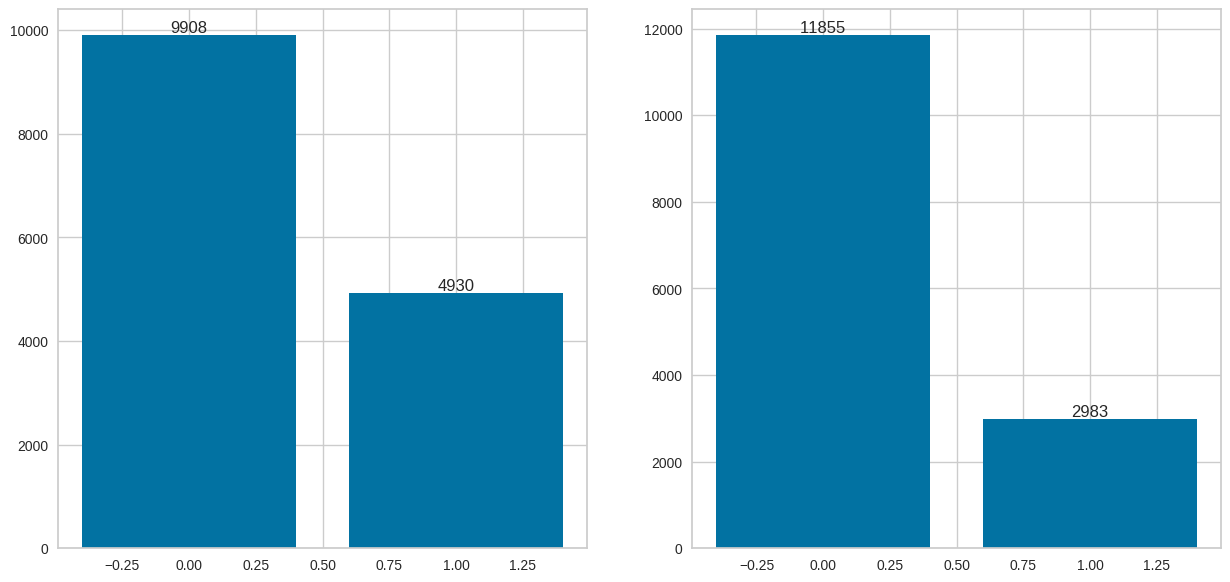

In [6]:
plot_distribution(train_df, ['EC1', 'EC2'])

In [7]:
train_ec1            = train_df.copy()
train_ec2            = train_df.copy()

train_ec1, valid_ec1 = data_split(train_ec1, lb_column = 'EC1')
train_ec2, valid_ec2 = data_split(train_ec2, lb_column = 'EC2')

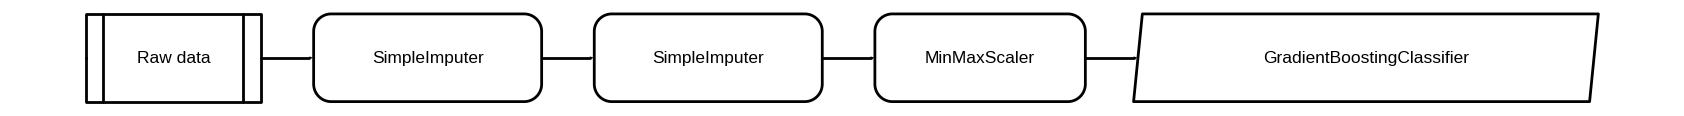




============================== auc ==============================


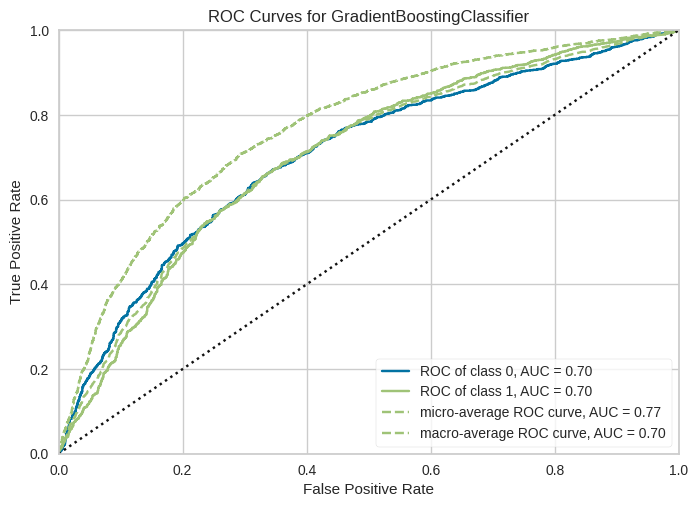




============================== pr ==============================


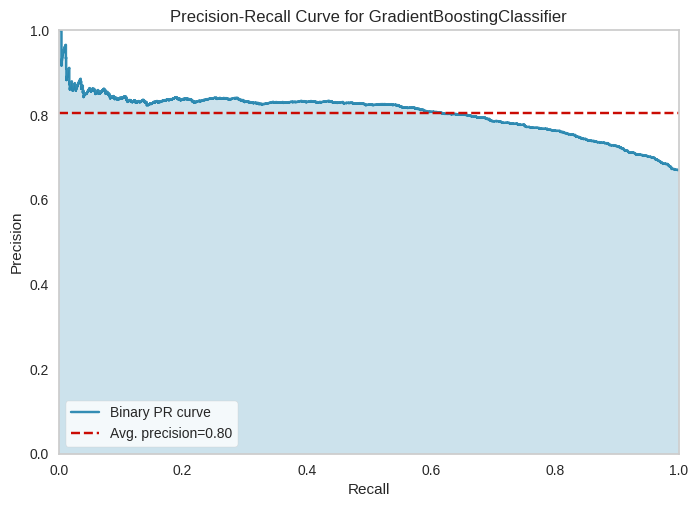




============================== confusion_matrix ==============================


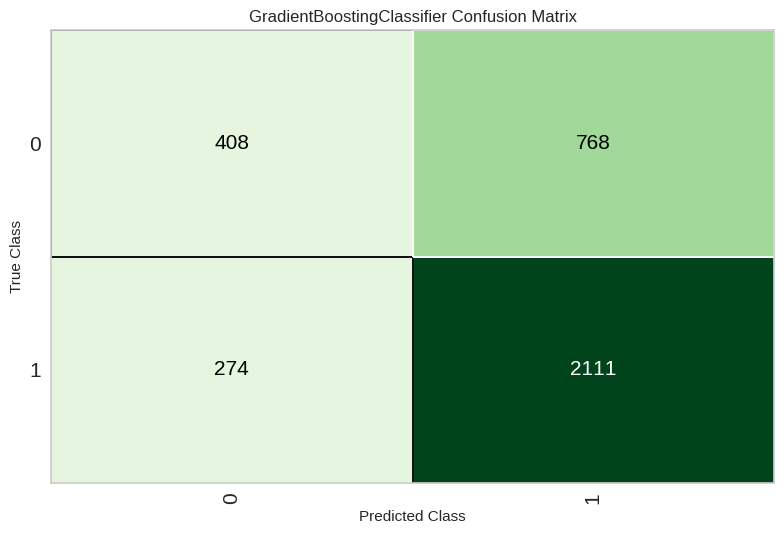




============================== error ==============================


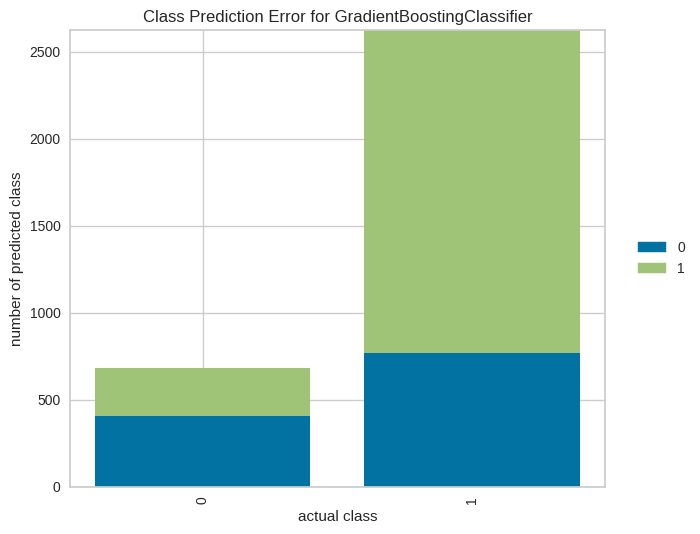




============================== class_report ==============================


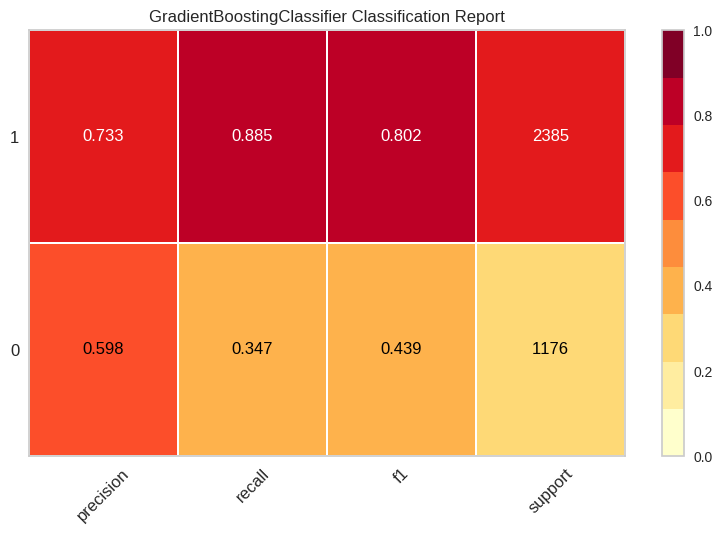




============================== calibration ==============================


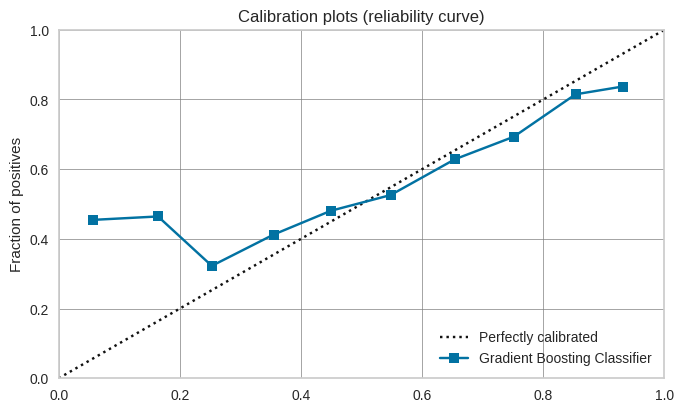




============================== feature ==============================


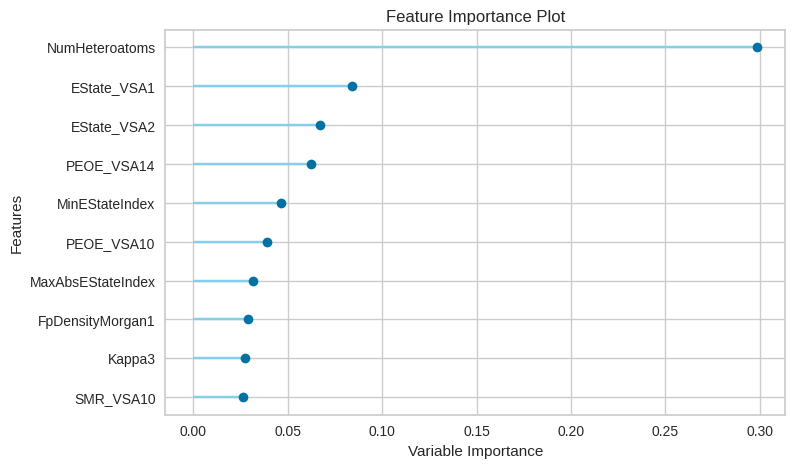




============================== feature_all ==============================


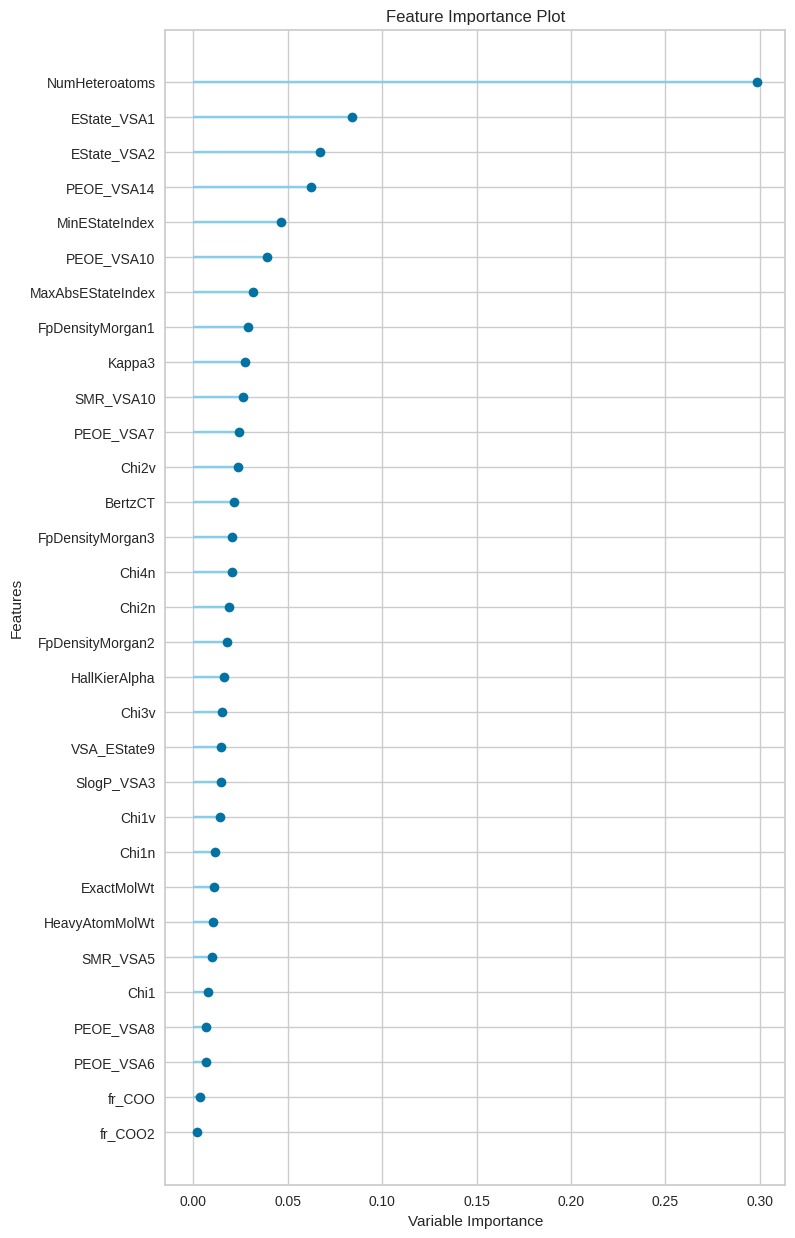




============================== parameter ==============================


,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,log_loss
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1





============================== lift ==============================


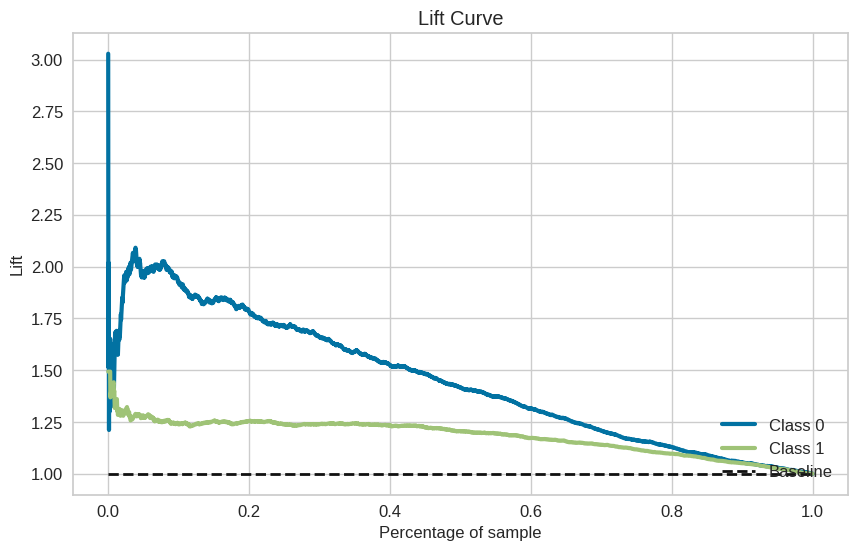




============================== gain ==============================


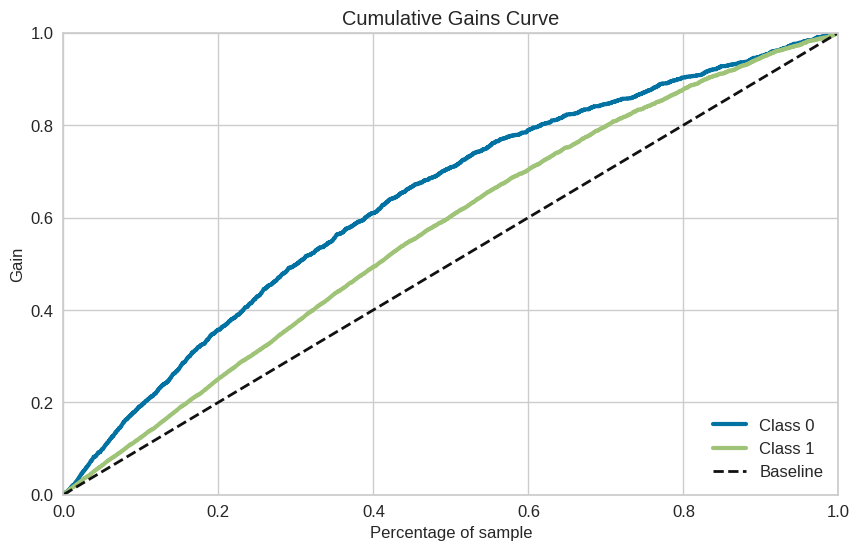

In [8]:
model_ec1            = setup(train_ec1, target = 'EC1', session_id = 999,
                            normalize = True, normalize_method = 'minmax')

best_auc_model_ec1   = compare_models(sort = 'AUC', n_select = 3)
holdout_pred_ec1     = predict_model(best_auc_model_ec1[0])
predictions_ec1      = predict_model(best_auc_model_ec1[0], data = test_df)

plot_metric(best_auc_model_ec1[0])

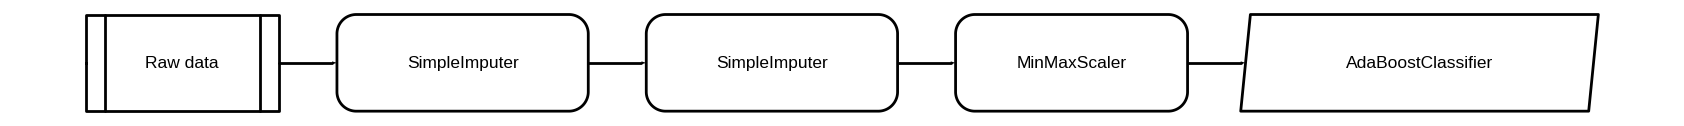




============================== auc ==============================


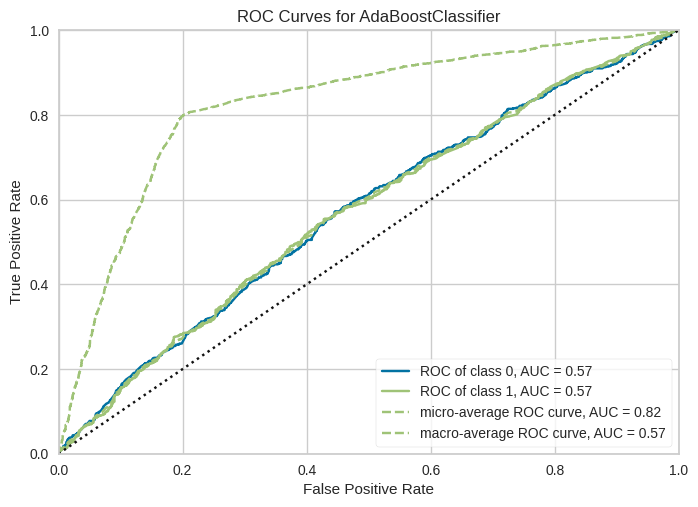




============================== pr ==============================


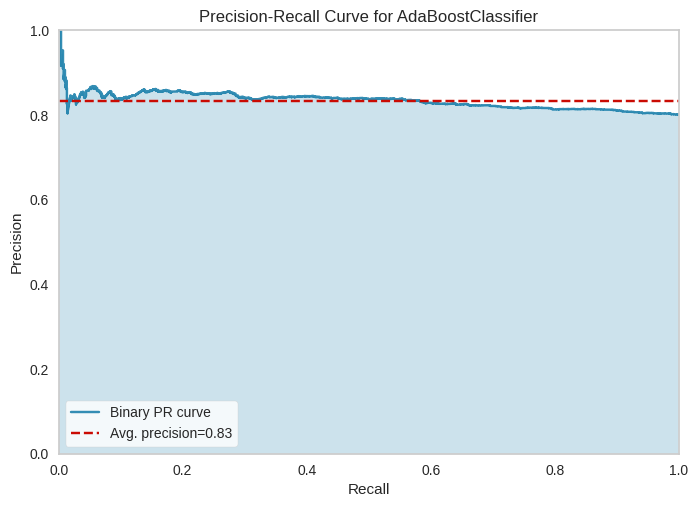




============================== confusion_matrix ==============================


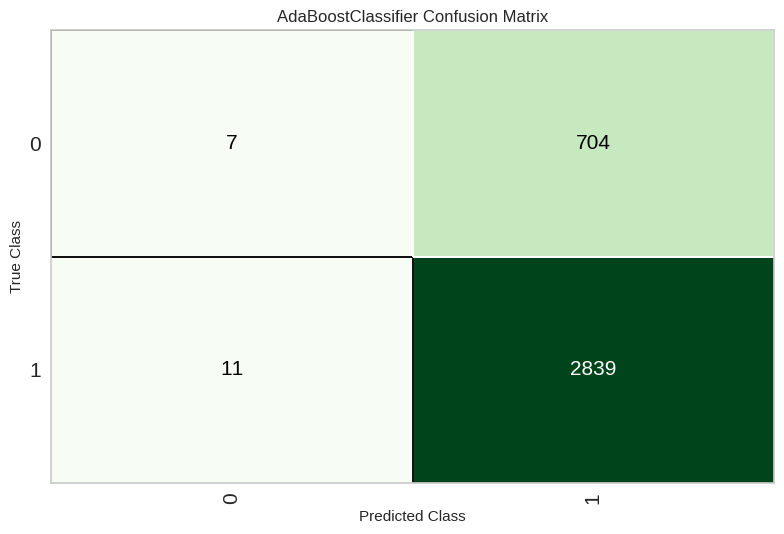




============================== error ==============================


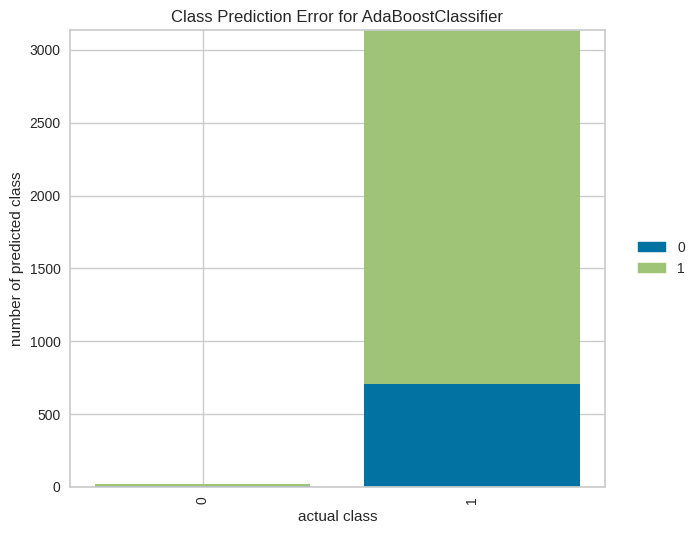




============================== class_report ==============================


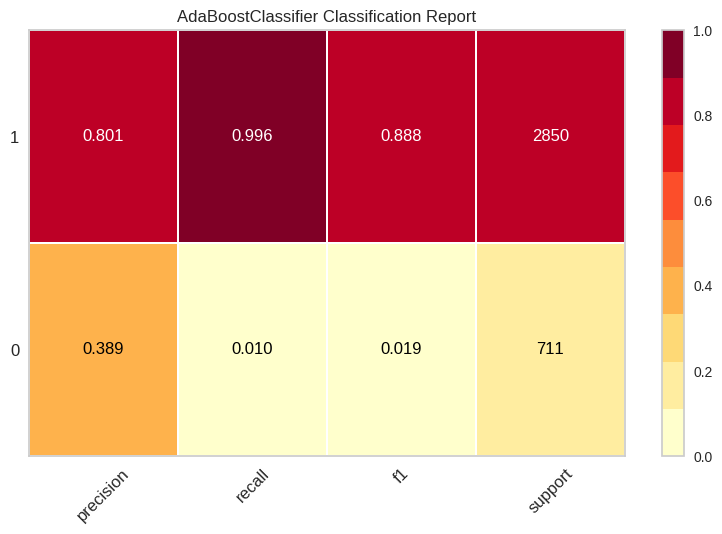




============================== calibration ==============================


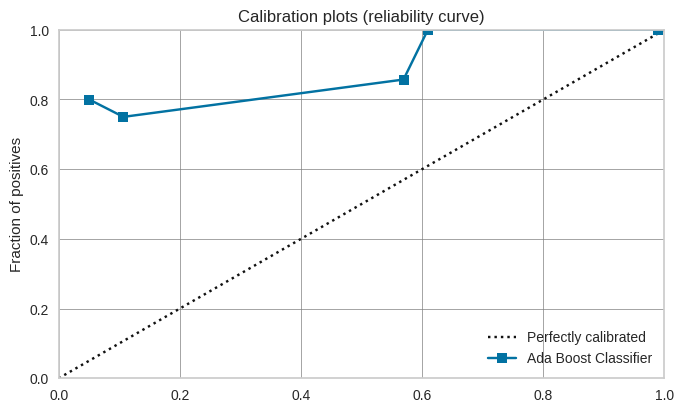




============================== feature ==============================


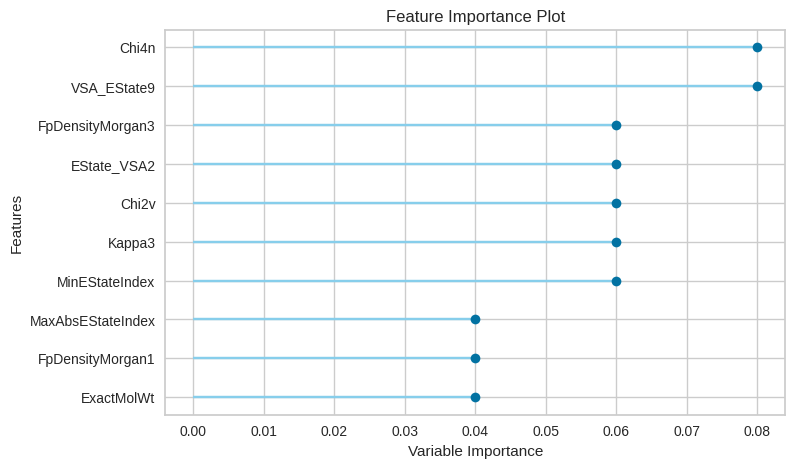




============================== feature_all ==============================


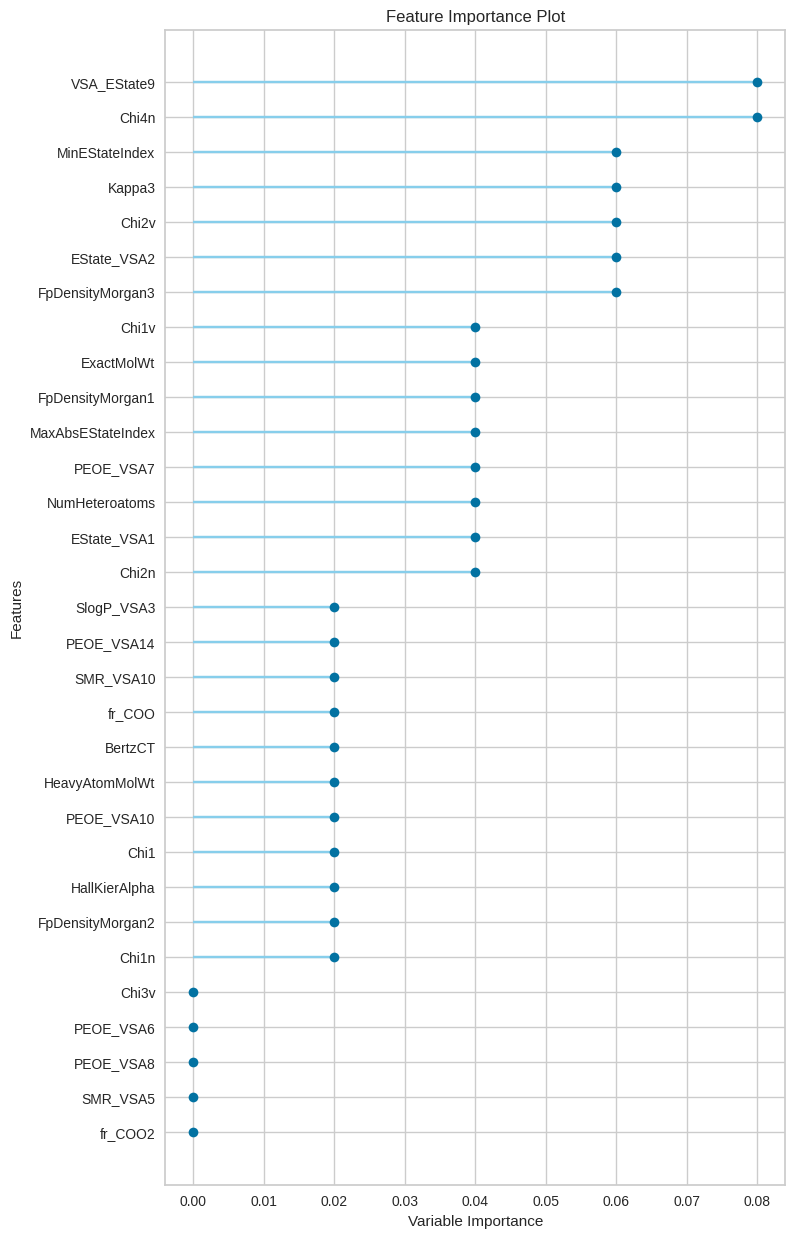




============================== parameter ==============================


,Parameters
algorithm,SAMME.R
base_estimator,None
learning_rate,1.0
n_estimators,50
random_state,999





============================== lift ==============================


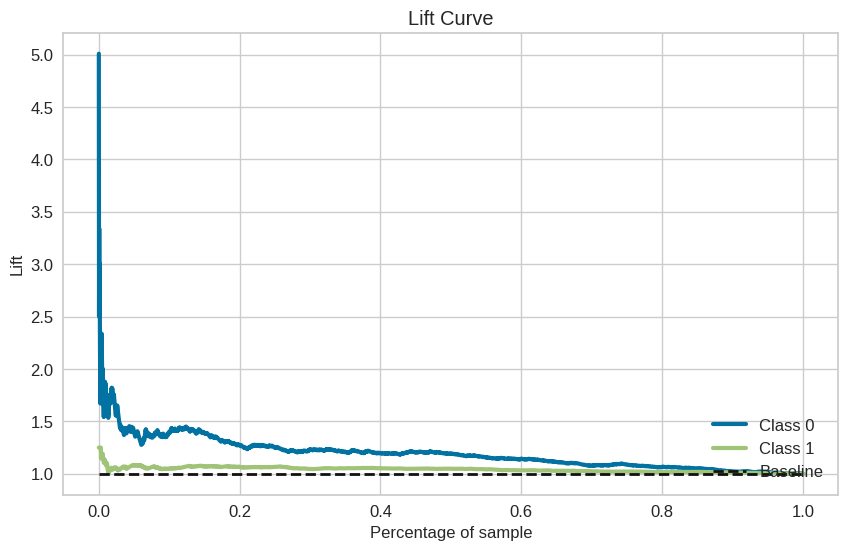




============================== gain ==============================


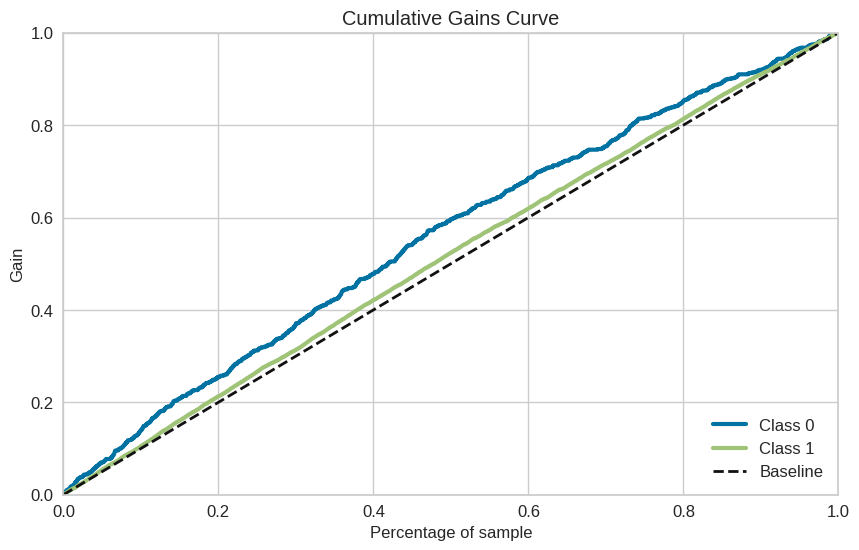

In [9]:
model_ec2            = setup(data = train_ec2, target = 'EC2', session_id = 999, 
                             normalize_method = 'minmax', normalize = True)

best_auc_model_ec2   = compare_models(sort = 'AUC',  n_select = 3)
holdout_pred_ec2     = predict_model(best_auc_model_ec2[0])
predictions_ec2      = predict_model(best_auc_model_ec2[0], data = test_df)

plot_metric(best_auc_model_ec2[0])

In [10]:
os.makedirs('submissions/enzyme', exist_ok = True)

submission['EC1'] = predictions_ec1['prediction_label']
submission['EC2'] = predictions_ec2['prediction_label']
submission.head()

submission.to_csv('submissions/enzyme/enzyme.csv', index = False)

In [11]:
train_df   = pd.read_csv(f'{DATA_PATH}/train.csv')
test_df    = pd.read_csv(f'{DATA_PATH}/test.csv')
submission = pd.read_csv(f'{DATA_PATH}/sample_submission.csv') 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14838 non-null  int64  
 1   BertzCT            14838 non-null  float64
 2   Chi1               14838 non-null  float64
 3   Chi1n              14838 non-null  float64
 4   Chi1v              14838 non-null  float64
 5   Chi2n              14838 non-null  float64
 6   Chi2v              14838 non-null  float64
 7   Chi3v              14838 non-null  float64
 8   Chi4n              14838 non-null  float64
 9   EState_VSA1        14838 non-null  float64
 10  EState_VSA2        14838 non-null  float64
 11  ExactMolWt         14838 non-null  float64
 12  FpDensityMorgan1   14838 non-null  float64
 13  FpDensityMorgan2   14838 non-null  float64
 14  FpDensityMorgan3   14838 non-null  float64
 15  HallKierAlpha      14838 non-null  float64
 16  HeavyAtomMolWt     148

In [12]:
train_smote_ec1      = train_df.copy()
train_smote_ec2      = train_df.copy()

In [13]:
train_ec1, valid_ec1 = data_split(train_smote_ec1, lb_column = 'EC1')
train_ec2, valid_ec2 = data_split(train_smote_ec2, lb_column = 'EC2')

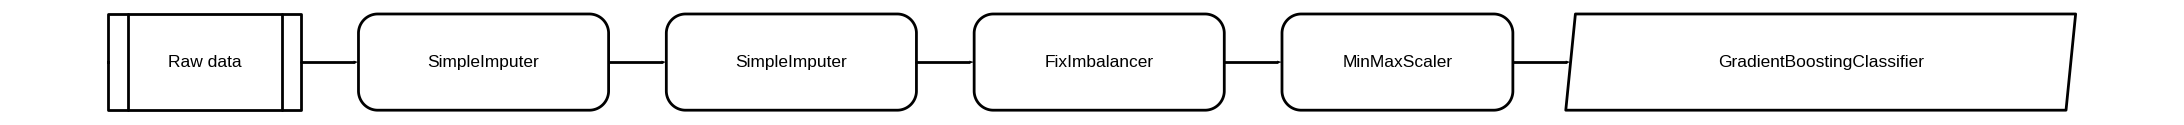




============================== auc ==============================


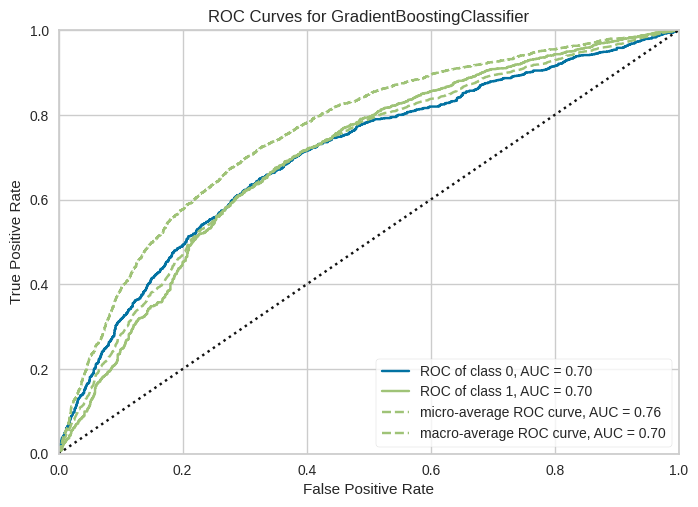




============================== pr ==============================


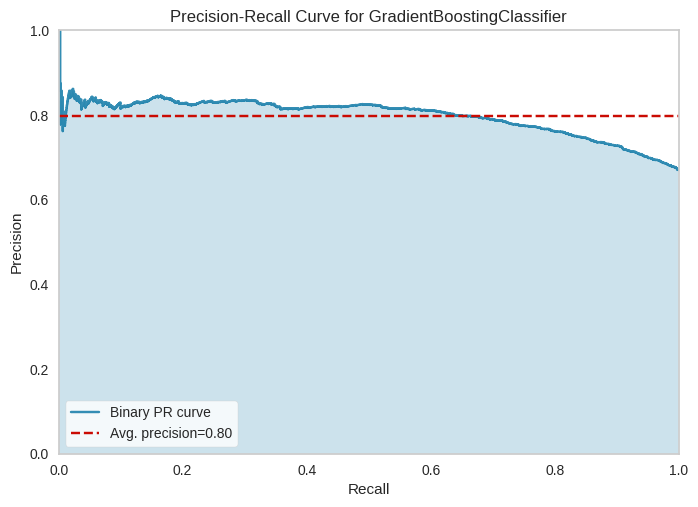




============================== confusion_matrix ==============================


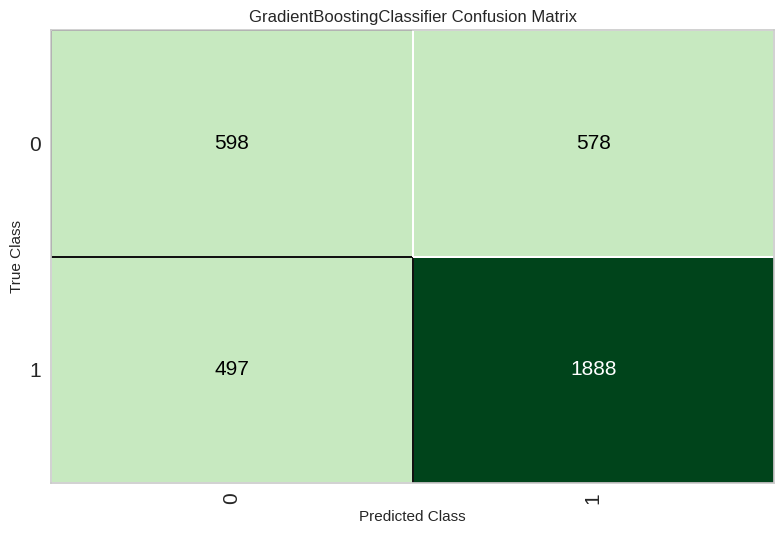




============================== error ==============================


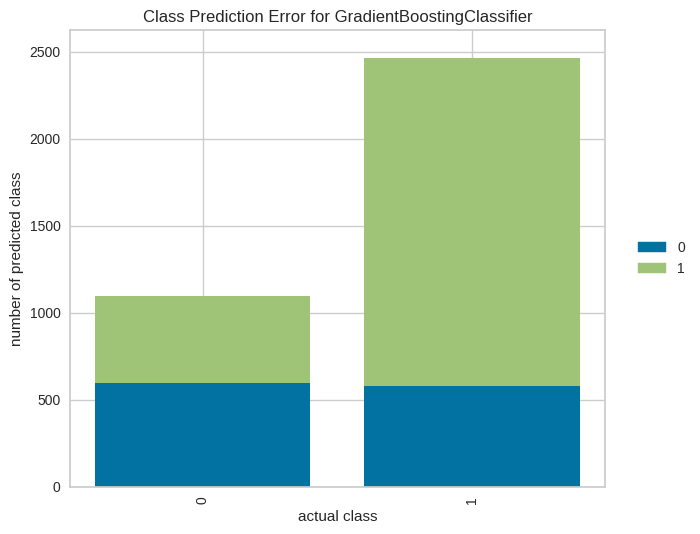




============================== class_report ==============================


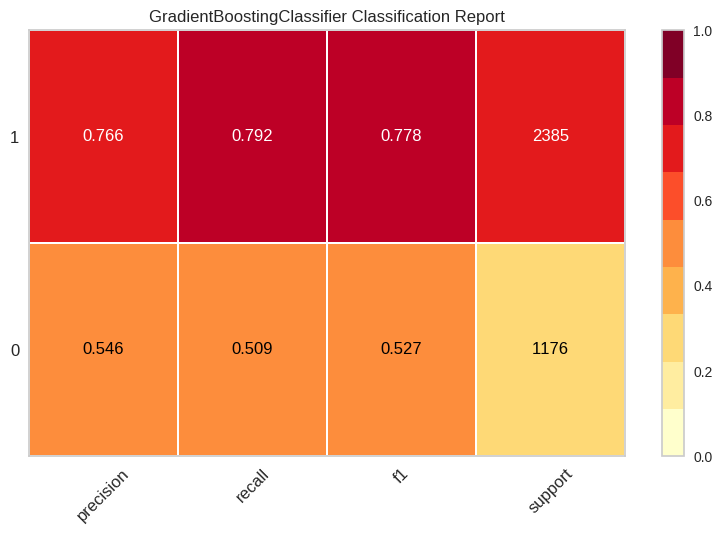




============================== calibration ==============================


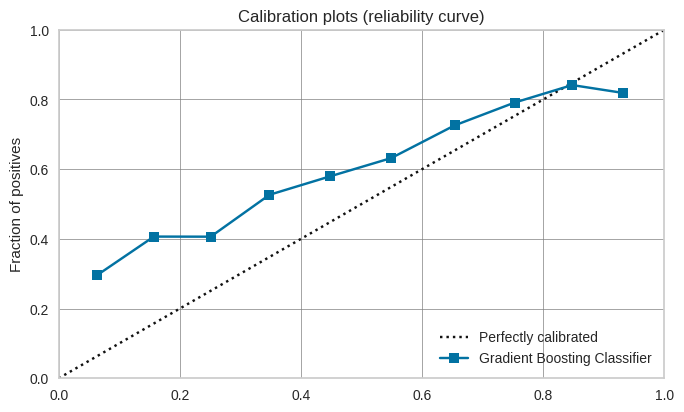




============================== feature ==============================


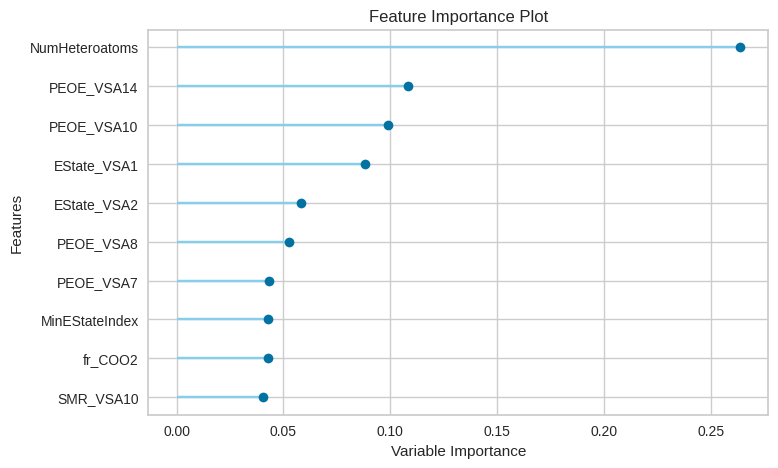




============================== feature_all ==============================


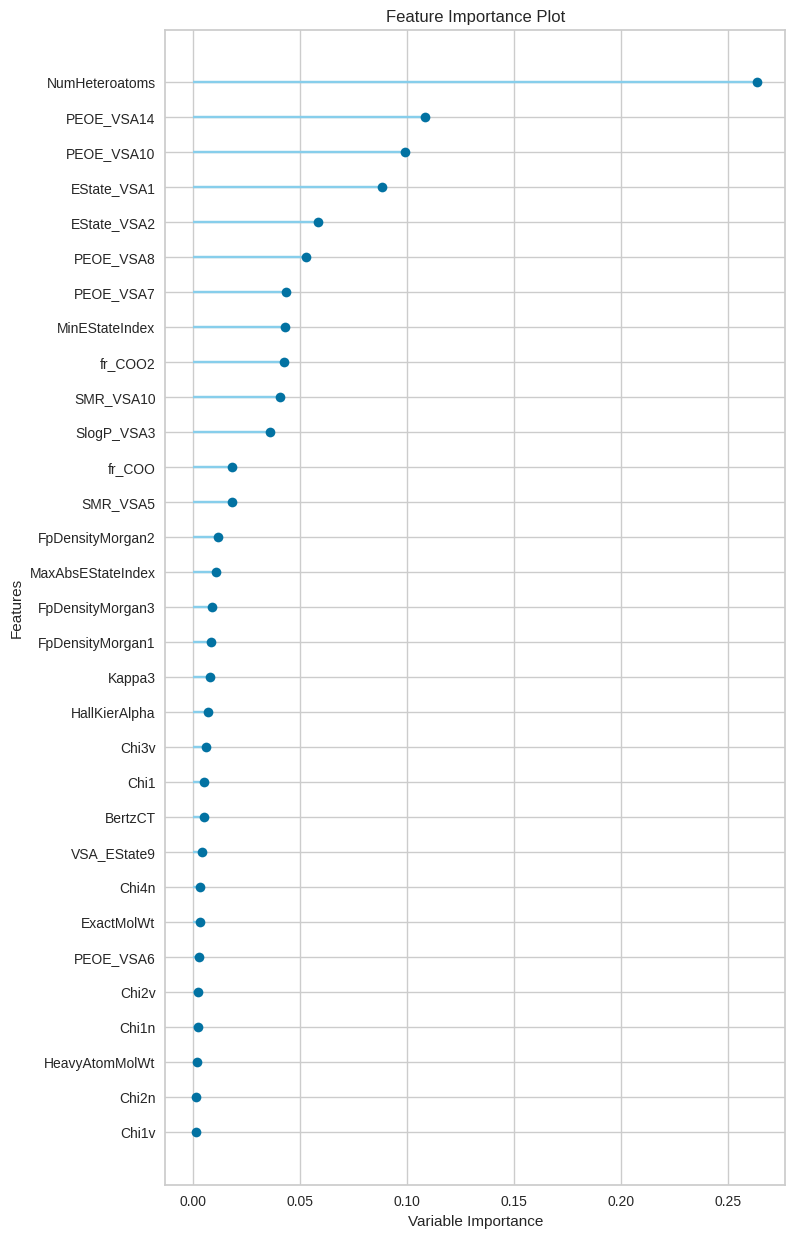




============================== parameter ==============================


,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,log_loss
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0
min_samples_leaf,1





============================== lift ==============================


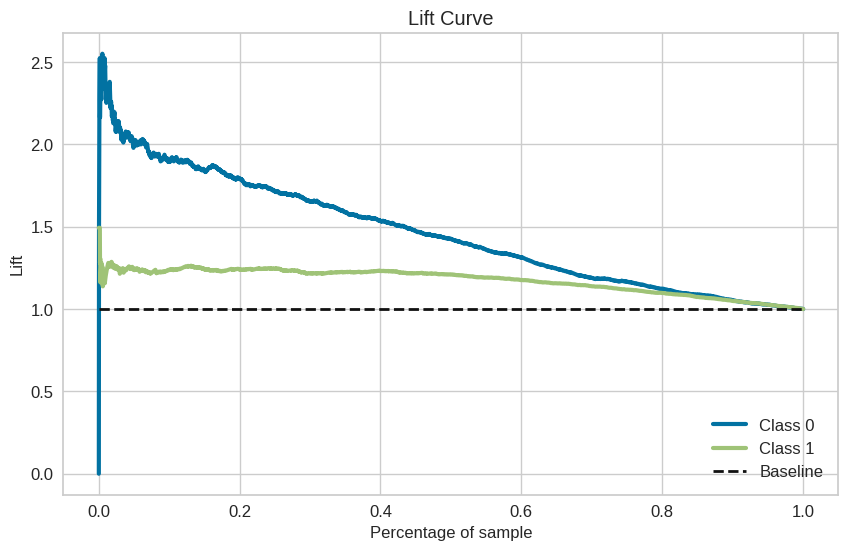




============================== gain ==============================


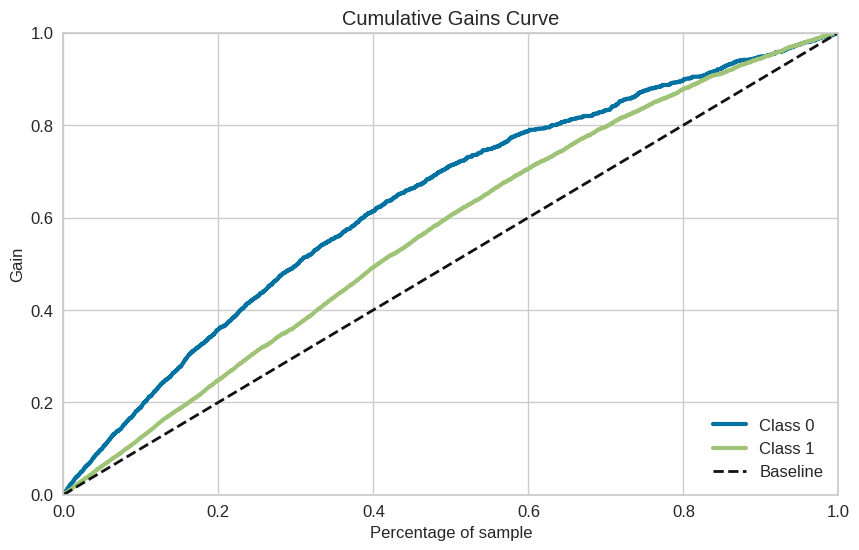

In [14]:
model_ec1            = setup(train_ec1, target = 'EC1', session_id = 999,
                            normalize = True, normalize_method = 'minmax', 
                            fix_imbalance = True)

best_auc_model_ec1   = compare_models(sort = 'AUC', n_select = 3)
holdout_pred_ec1     = predict_model(best_auc_model_ec1[0])
predictions_ec1      = predict_model(best_auc_model_ec1[0], data = test_df)

plot_metric(best_auc_model_ec1[0])

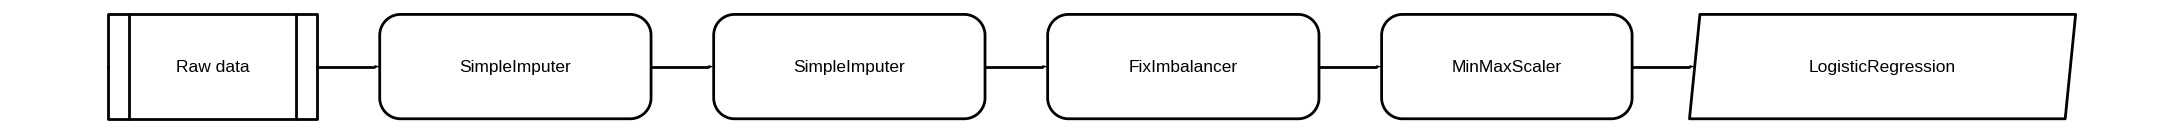




============================== auc ==============================


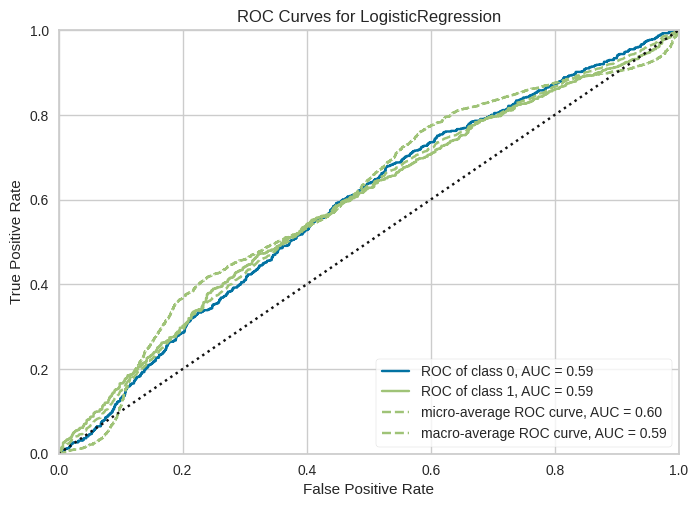




============================== pr ==============================


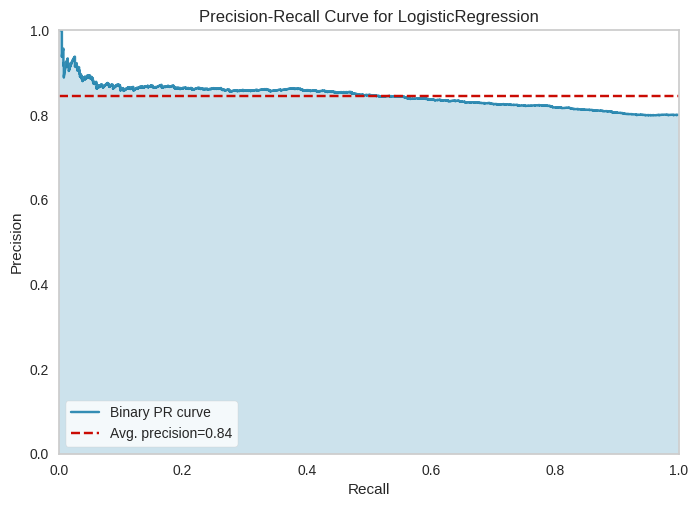




============================== confusion_matrix ==============================


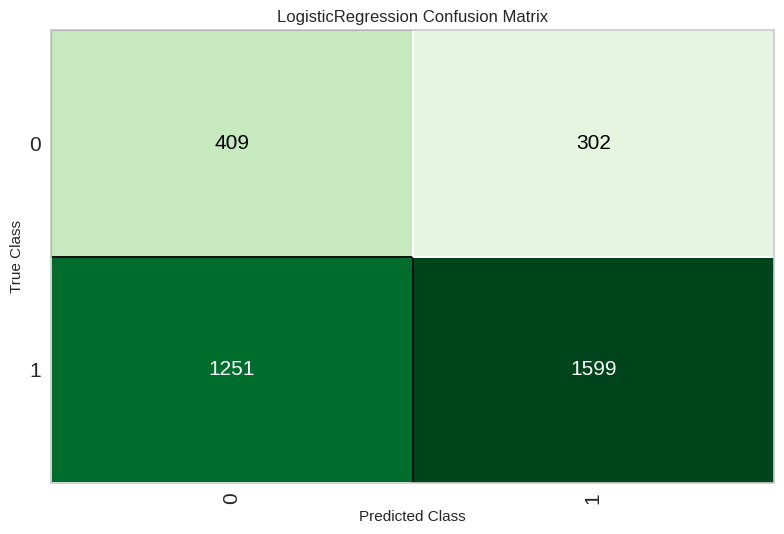




============================== error ==============================


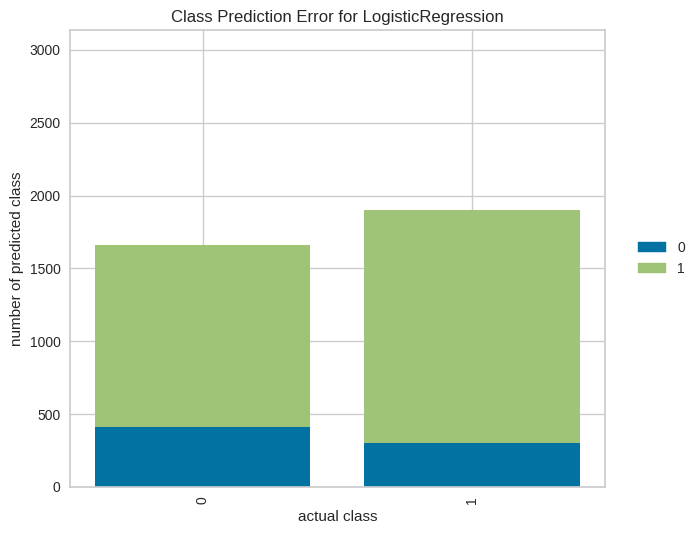




============================== class_report ==============================


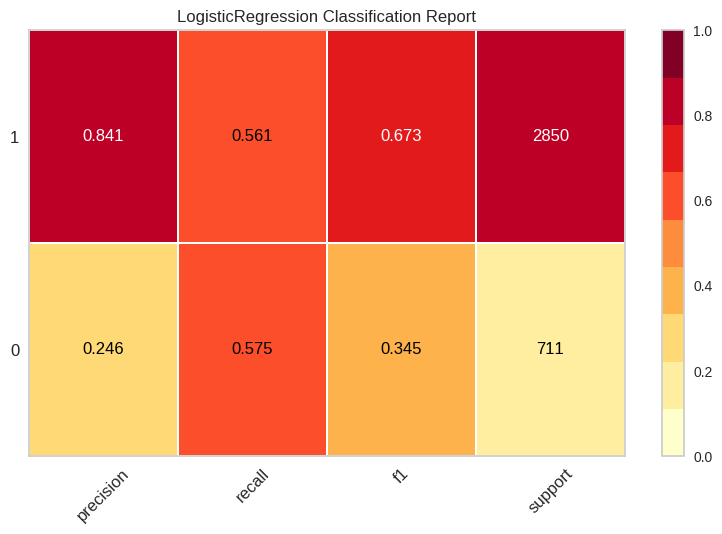




============================== calibration ==============================


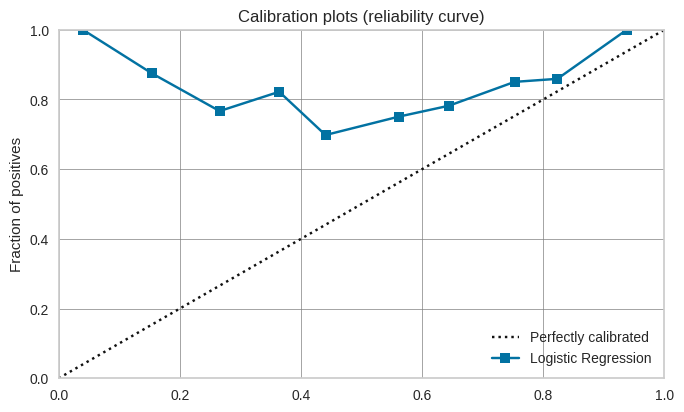




============================== feature ==============================


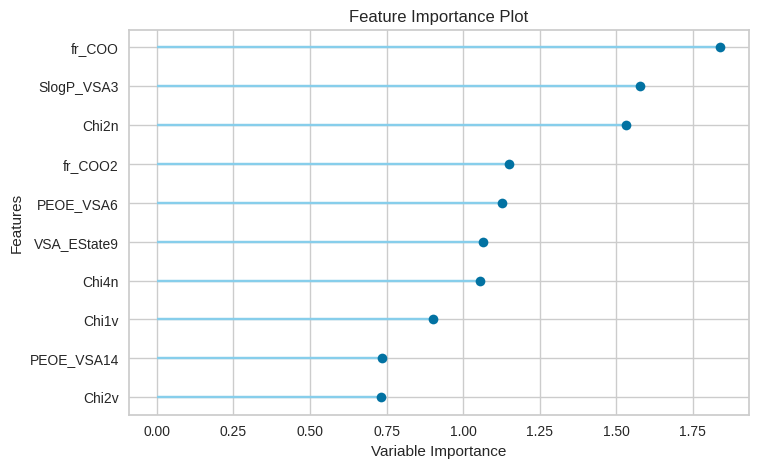




============================== feature_all ==============================


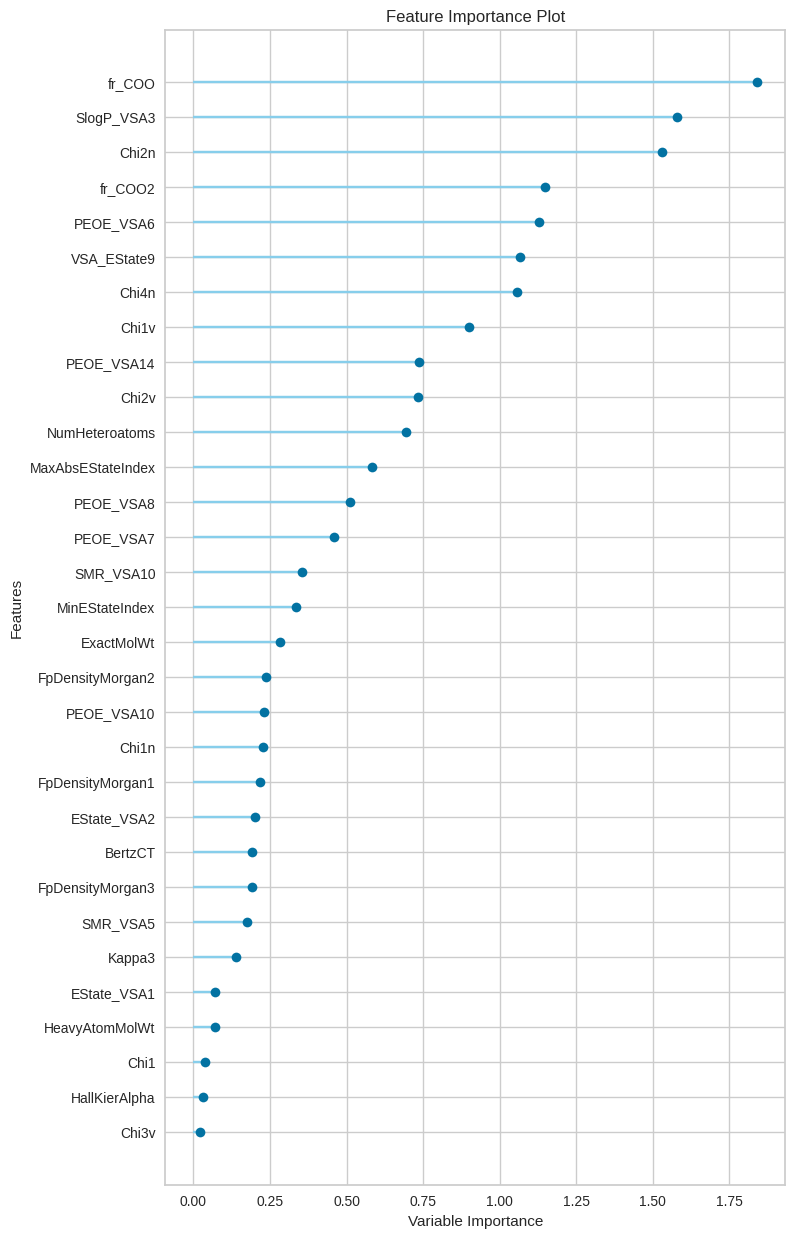




============================== parameter ==============================


,Parameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2





============================== lift ==============================


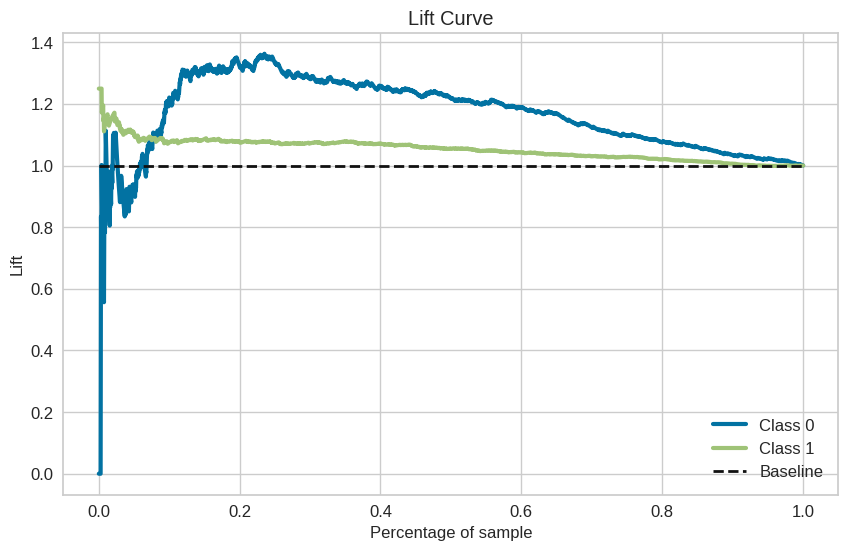




============================== gain ==============================


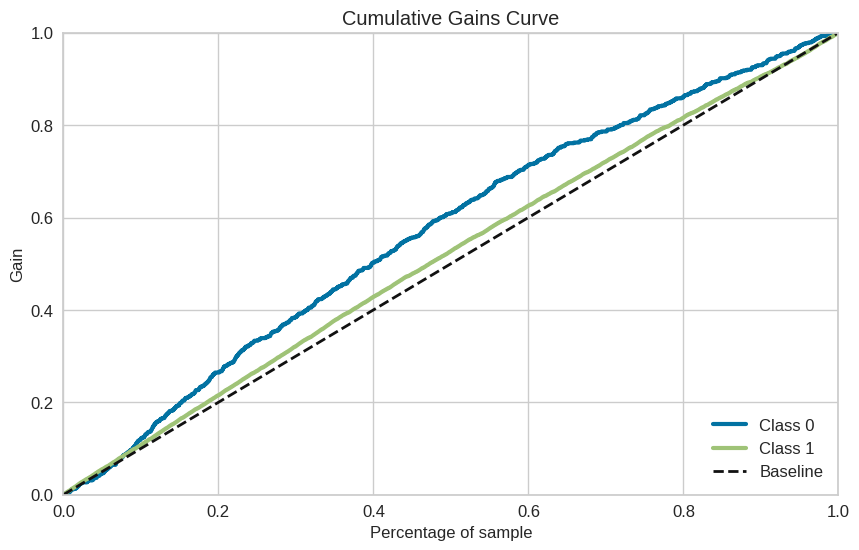

In [15]:
model_ec2            = setup(data = train_ec2, target = 'EC2', session_id = 999, 
                             normalize_method = 'minmax', normalize = True,
                             fix_imbalance = True)

best_auc_model_ec2   = compare_models(sort = 'AUC',  n_select = 3)
holdout_pred_ec2     = predict_model(best_auc_model_ec2[0])
predictions_ec2      = predict_model(best_auc_model_ec2[0], data = test_df)

plot_metric(best_auc_model_ec2[0])

In [16]:
os.makedirs('submissions/enzyme', exist_ok = True)

submission['EC1'] = predictions_ec1['prediction_label']
submission['EC2'] = predictions_ec2['prediction_label']
submission.head()

submission.to_csv('submissions/enzyme/enzyme_smote.csv', index = False)